In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
# Load data from WTI daily into a data frame. 
# Set the names of the columns to be "date" and "oil".
# The "Date" column should be the index.

oil_filename = '../data/wti-daily.csv'
oil_df = pd.read_csv(oil_filename, 
                     parse_dates=[0], 
                     header=0,
                     names=['date', 'oil'],
                     index_col=0)

oil_df.head()

,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [26]:
# Load ice cream prices (for a half gallon, aka 1.9 liters) into 
# a data frame. Parse the date column, and set it to be the index.
# Set the column names to be "date" and "icecream".

ice_cream_filename = '../data/ice-cream.csv'
ice_cream_df = pd.read_csv(ice_cream_filename, 
                           parse_dates=[0], 
                           index_col=0,
                           header=0,
                          names=['date','icecream'])
ice_cream_df.head()

,icecream
date,
1980-01-01,1.755
1980-02-01,1.775
1980-03-01,1.718
1980-04-01,1.769
1980-05-01,1.822


In [27]:
# What dtype does the "icecream" column contain?
ice_cream_df.dtypes

icecream    object
dtype: object

In [28]:
# How many columns lack digits 0-9?
(
    ice_cream_df['icecream']
    .str.contains(r'\d', regex=True)
    .value_counts()
)

icecream
True     504
False      1
Name: count, dtype: int64

In [29]:
# # Remove columns that lack any digits, then turn the "icecream"
# # column into an np.float64.


ice_cream_df = (
    ice_cream_df
    .loc[ice_cream_df['icecream'].str.contains(r'\d', regex=True)]
    .astype(np.float64)
)

In [31]:
ice_cream_df.head()

,icecream
date,
1980-01-01,1.755
1980-02-01,1.775
1980-03-01,1.718
1980-04-01,1.769
1980-05-01,1.822


In [32]:
# Read the "miles traveled" CSV file into a data frame.
# Set the column names to be "date" and 
miles_filename = '../data/miles-traveled.csv'
miles_df = pd.read_csv(miles_filename, parse_dates=[0], 
                       index_col=0,
                       header=0,
                      names=['date', 'miles'])
miles_df.head()

,miles
date,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [40]:
# Create a single data frame in which the index will consist of dates (the start of each month)
# and the values will be oil and ice cream prices, as well as miles traveled for
# each month.  Ignore months in which one or more of the values are unavailable.

df = (
    oil_df
    .join(ice_cream_df, how='inner')
    .join(miles_df, how='inner')
)
df.head()

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382,150277.0
1986-05-01,13.80,2.368,160459.0
1986-07-01,12.39,2.369,171114.0
1986-08-01,11.56,2.319,173977.0
1986-10-01,15.23,2.377,159434.0


In [41]:
df.shape

(275, 3)

In [34]:
df.corr()

,oil,icecream,miles
oil,1.000000,0.777347,0.645250
icecream,0.777347,1.000000,0.818383
miles,0.645250,0.818383,1.000000


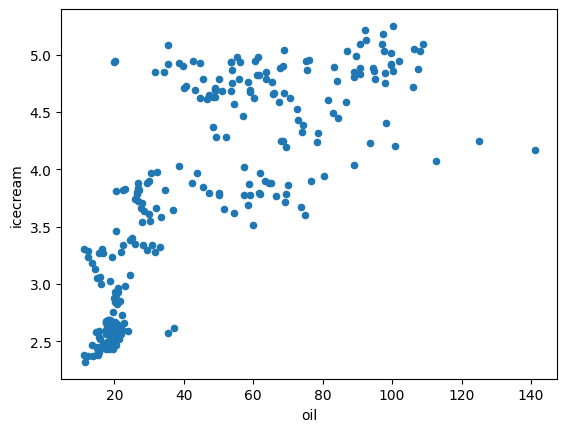

In [35]:
p = df.plot.scatter(x='oil', y='icecream')
f = p.get_figure()
f.savefig('../../media/CH10_F18_LERNER.jpg')


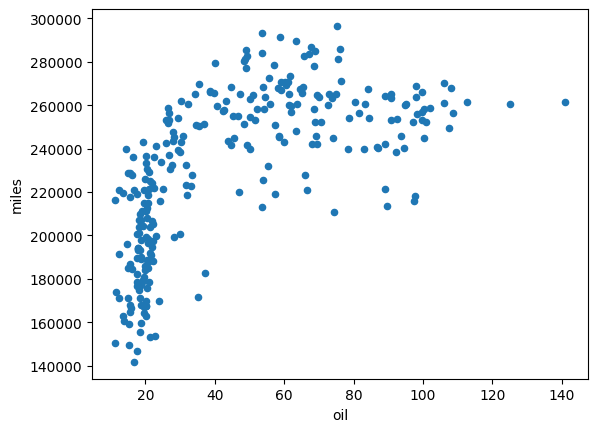

In [36]:
p = df.plot.scatter(x='oil', y='miles')
f = p.get_figure()
f.savefig('../../media/CH10_F19_LERNER.jpg')


array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='icecream', ylabel='oil'>,
        <Axes: xlabel='miles', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='icecream'>,
        <Axes: xlabel='icecream', ylabel='icecream'>,
        <Axes: xlabel='miles', ylabel='icecream'>],
       [<Axes: xlabel='oil', ylabel='miles'>,
        <Axes: xlabel='icecream', ylabel='miles'>,
        <Axes: xlabel='miles', ylabel='miles'>]], dtype=object)

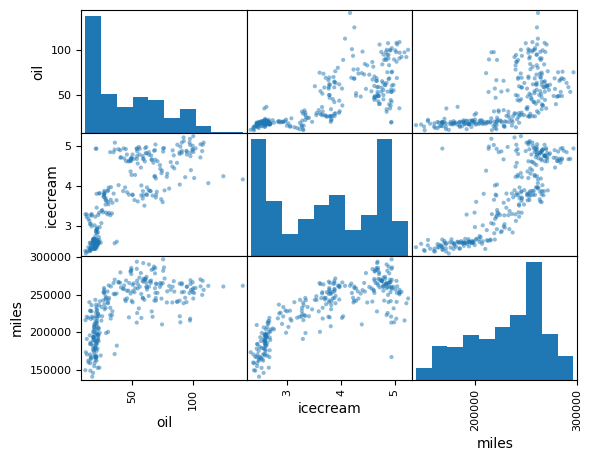

In [37]:
# Create scatter plots for all combinations of columns
from pandas.plotting import scatter_matrix
scatter_matrix(df)


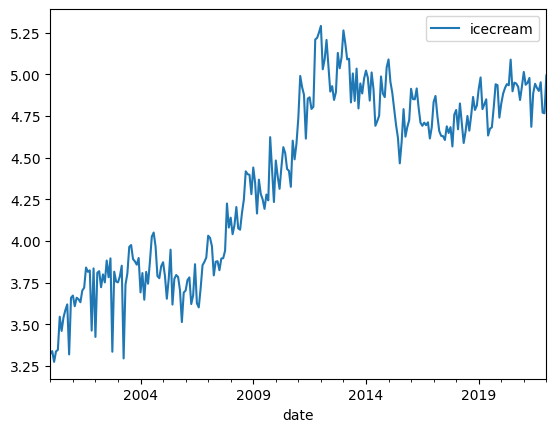

In [38]:
p = ice_cream_df['2000':].plot.line()
f = p.get_figure()
f.savefig('../../media/CH10_F21_LERNER.jpg')